In [172]:
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [173]:
%ls

__pycache__/               lora_compensation_results/
gpt2_model/                lora_compensatory.ipynb
hooked_lora.py             results/
hooking.py                 results.ipynb


In [174]:
import os
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [175]:
path = "lora_compensation_results/"
files = os.listdir(path)
files

['lora_compensatory_adapt_all_layer_10_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_1_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_7_attn_results.pkl',
 'lora_compensatory_adapt_all_layer_8_attn_results.pkl',
 'lora_compensatory_adapt_all_layer_9_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_3_attn_results.pkl',
 'lora_compensatory_adapt_all_layer_6_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_8_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_6_attn_results.pkl',
 'lora_compensatory_adapt_all_layer_7_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_11_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_0_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_9_attn_results.pkl',
 'lora_compensatory_adapt_all_initial_results.pkl',
 'lora_compensatory_adapt_all_layer_2_attn_results.pkl',
 'lora_compensatory_adapt_all_layer_5_mlp_results.pkl',
 'lora_compensatory_adapt_all_layer_5_attn_results.pkl',
 'lora_compensatory_adapt_all_layer_1_attn_

In [176]:
def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        loaded_object = pickle.load(file)
    return loaded_object


res1 = load_pickle(path+"lora_compensatory_adapt_all_initial_results.pkl")
results = [res1]
for i in range(12*2):
    if i % 2 == 0: 
        res = load_pickle(path+f"lora_compensatory_adapt_all_layer_{i//2}_attn_results.pkl") 
    else: 
        res = load_pickle(path+f"lora_compensatory_adapt_all_layer_{i//2}_mlp_results.pkl")
    results.append(res)

In [177]:
total_reference_new_logits = []
total_reference_target_logits = []
total_ablate_new_logits = []
total_ablate_target_logits = []
total_reference_decomposed_residual_new = []
total_reference_decomposed_residual_target = []
total_ablate_decomposed_residual_new = []
total_ablate_decomposed_residual_target = []

for result in results: 
    
    all_reference_new_logits = []
    all_reference_target_logits = []
    all_ablate_new_logits = []
    all_ablate_target_logits = []
    all_reference_decomposed_residual_new = []
    all_reference_decomposed_residual_target = []
    all_ablate_decomposed_residual_new = []
    all_ablate_decomposed_residual_target = []
    

    for sample in result:
        
        reference_new_logit = sample["reference_new_logit"]
        reference_target_logit = sample["reference_target_logit"]
        ablate_new_logit = sample["ablate_new_logit"]
        ablate_target_logit = sample["ablate_target_logit"]
        reference_decomposed_residual_new = sample["reference_decomposed_residual_new"]
        reference_decomposed_residual_target = sample["reference_decomposed_residual_target"]
        ablate_decomposed_residual_new = sample["ablate_decomposed_residual_new"]
        ablate_decomposed_residual_target = sample["ablate_decomposed_residual_target"]
        
        all_reference_new_logits.append(reference_new_logit)
        all_reference_target_logits.append(reference_target_logit)
        all_ablate_new_logits.append(ablate_new_logit)
        all_ablate_target_logits.append(ablate_target_logit)
        all_reference_decomposed_residual_new.append(reference_decomposed_residual_new)
        all_reference_decomposed_residual_target.append(reference_decomposed_residual_target)
        all_ablate_decomposed_residual_new.append(ablate_decomposed_residual_new)
        all_ablate_decomposed_residual_target.append(ablate_decomposed_residual_target)

    all_reference_new_logits = torch.stack(all_reference_new_logits, dim=0)
    all_reference_target_logits = torch.stack(all_reference_target_logits, dim=0)
    all_ablate_new_logits = torch.stack(all_ablate_new_logits, dim=0)
    all_ablate_target_logits = torch.stack(all_ablate_target_logits, dim=0)
    all_reference_decomposed_residual_new = torch.stack(all_reference_decomposed_residual_new, dim=0)
    all_reference_decomposed_residual_target = torch.stack(all_reference_decomposed_residual_target, dim=0)
    all_ablate_decomposed_residual_new = torch.stack(all_ablate_decomposed_residual_new, dim=0)
    all_ablate_decomposed_residual_target = torch.stack(all_ablate_decomposed_residual_target, dim=0)
    
    total_reference_new_logits.append(all_reference_new_logits)
    total_reference_target_logits.append(all_reference_target_logits)
    total_ablate_new_logits.append(all_ablate_new_logits)
    total_ablate_target_logits.append(all_ablate_target_logits)
    total_reference_decomposed_residual_new.append(all_reference_decomposed_residual_new)
    total_reference_decomposed_residual_target.append(all_reference_decomposed_residual_target)
    total_ablate_decomposed_residual_new.append(all_ablate_decomposed_residual_new)
    total_ablate_decomposed_residual_target.append(all_ablate_decomposed_residual_target)
    
total_reference_new_logits = torch.stack(total_reference_new_logits, dim=0)
total_reference_target_logits = torch.stack(total_reference_target_logits, dim=0)
total_ablate_new_logits = torch.stack(total_ablate_new_logits, dim=0)
total_ablate_target_logits = torch.stack(total_ablate_target_logits, dim=0)
total_reference_decomposed_residual_new = torch.stack(total_reference_decomposed_residual_new, dim=0)
total_reference_decomposed_residual_target = torch.stack(total_reference_decomposed_residual_target, dim=0)
total_ablate_decomposed_residual_new = torch.stack(total_ablate_decomposed_residual_new, dim=0)
total_ablate_decomposed_residual_target = torch.stack(total_ablate_decomposed_residual_target, dim=0)    

In [185]:
print(total_reference_new_logits.shape)
print(total_reference_target_logits.shape)
print(total_ablate_new_logits.shape)
print(total_ablate_target_logits.shape)
print(total_reference_decomposed_residual_new.shape)
print(total_reference_decomposed_residual_target.shape)
print(total_ablate_decomposed_residual_new.shape)
print(total_ablate_decomposed_residual_target.shape)

torch.Size([99, 24, 1])
torch.Size([99, 24, 1])
torch.Size([99, 24, 1])
torch.Size([99, 24, 1])
torch.Size([99, 24, 24])
torch.Size([99, 24, 24])
torch.Size([99, 24, 24])
torch.Size([99, 24, 24])


In [179]:
total_reference_new_logits = total_reference_new_logits.transpose(0, 1)
total_reference_target_logits = total_reference_target_logits.transpose(0, 1)
total_ablate_new_logits = total_ablate_new_logits.transpose(0, 1)
total_ablate_target_logits = total_ablate_target_logits.transpose(0, 1)
total_reference_decomposed_residual_new = total_reference_decomposed_residual_new.transpose(0, 1)
total_reference_decomposed_residual_target = total_reference_decomposed_residual_target.transpose(0, 1)
total_ablate_decomposed_residual_new = total_ablate_decomposed_residual_new.transpose(0, 1)
total_ablate_decomposed_residual_target = total_ablate_decomposed_residual_target.transpose(0, 1)

In [180]:
layer_names = []
for i in range(24): 
    if i % 2 == 0: 
        layer_names.append(f"{i//2}_attn")
    else:
        layer_names.append(f"{i//2}_mlp")
attn_mask = torch.tensor(["attn" in layer_name for layer_name in layer_names])
mlp_mask = torch.tensor(["mlp" in layer_name for layer_name in layer_names])


In [181]:
no_training_total_reference_new_logits = total_reference_new_logits[:,0]
no_training_total_reference_target_logits = total_reference_target_logits[:,0]
no_training_total_ablate_new_logits = total_ablate_new_logits[:,0]
no_training_total_ablate_target_logits = total_ablate_target_logits[:,0]
no_training_total_reference_decomposed_residual_new = total_reference_decomposed_residual_new[:,0][:,2:]
no_training_total_reference_decomposed_residual_target = total_reference_decomposed_residual_target[:,0][:,2:]
no_training_total_ablate_decomposed_residual_new = total_ablate_decomposed_residual_new[:,0][:,2:]
no_training_total_ablate_decomposed_residual_target = total_ablate_decomposed_residual_target[:,0][:,2:]



In [199]:
print(no_training_total_reference_new_logits.shape)
print(no_training_total_reference_target_logits.shape)
print(no_training_total_ablate_new_logits.shape)
print(no_training_total_ablate_target_logits.shape)
print(no_training_total_reference_decomposed_residual_new.shape)
print(no_training_total_reference_decomposed_residual_target.shape)
print(no_training_total_ablate_decomposed_residual_new.shape)
print(no_training_total_ablate_decomposed_residual_target.shape)

torch.Size([99, 1])
torch.Size([99, 1])
torch.Size([99, 1])
torch.Size([99, 1])
torch.Size([99, 24])
torch.Size([99, 24])
torch.Size([99, 24])
torch.Size([99, 24])


In [184]:
total_reference_new_logits = total_reference_new_logits[:,1:,:]
total_reference_target_logits = total_reference_target_logits[:,1:,:]
total_ablate_new_logits = total_ablate_new_logits[:,1:,:]
total_ablate_target_logits = total_ablate_target_logits[:,1:,:]

total_reference_decomposed_residual_new = total_reference_decomposed_residual_new[:,1:,2:]
total_reference_decomposed_residual_target = total_reference_decomposed_residual_target[:,1:,2:]
total_ablate_decomposed_residual_new = total_ablate_decomposed_residual_new[:,1:,2:]
total_ablate_decomposed_residual_target = total_ablate_decomposed_residual_target[:,1:,2:]


In [186]:
print(total_reference_new_logits.shape)
print(total_reference_target_logits.shape)
print(total_ablate_new_logits.shape)
print(total_ablate_target_logits.shape)
print(total_reference_decomposed_residual_new.shape)
print(total_reference_decomposed_residual_target.shape)
print(total_ablate_decomposed_residual_new.shape)
print(total_ablate_decomposed_residual_target.shape)

torch.Size([99, 24, 1])
torch.Size([99, 24, 1])
torch.Size([99, 24, 1])
torch.Size([99, 24, 1])
torch.Size([99, 24, 24])
torch.Size([99, 24, 24])
torch.Size([99, 24, 24])
torch.Size([99, 24, 24])


In [202]:
no_training_total_reference_new_logits.shape

torch.Size([99, 1])

In [210]:
direct_effect =  torch.diagonal(total_ablate_decomposed_residual_new, dim1=1, dim2=2) - torch.diagonal(total_reference_decomposed_residual_new, dim1=1, dim2=2)
total_effect = total_ablate_new_logits - total_reference_target_logits


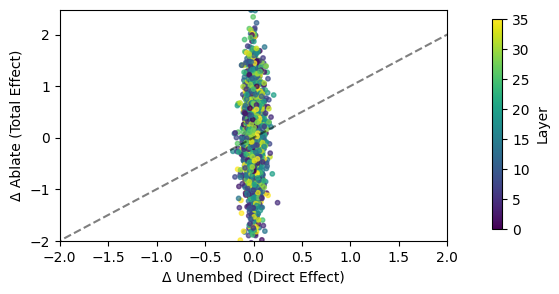

In [211]:
delta_ablate = total_effect
delta_unembed = direct_effect
batch = delta_ablate.shape[0]

fig = plt.figure(figsize=(5, 3))
for i in range(batch): 
    x = delta_unembed[i]
    y = delta_ablate[i]
    layer_colors = plt.cm.viridis(np.linspace(0, 1, x.shape[-1]))
    plt.scatter(x = x, y = y, c=layer_colors, s=10, marker='o', alpha=0.7)
    
min_val = min(delta_unembed.min(), delta_ablate.min())
max_val = max(delta_unembed.max(), delta_ablate.max())

plt.ylabel("Δ Ablate (Total Effect)")
plt.xlabel("Δ Unembed (Direct Effect)")

magnitude_axis=2
plt.xlim(-magnitude_axis, magnitude_axis)
plt.ylim(-magnitude_axis, max_val)

# Set the limits for the dashed line to go through zero and extend on both sides
line_min = min(min_val, 0)
line_max = max(max_val, 0)
plt.plot([line_min, line_max], [line_min, line_max], color='black', linestyle='dashed', alpha=0.5)
cax = fig.add_axes([0.99, 0.15, 0.02, 0.7])  # Adjust the position and size as needed
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), cax=cax)
tick_locations = np.linspace(0, 1, 8)  # Adjust the number of ticks as needed
tick_labels = np.arange(0, 36, 5)
cbar.set_ticks(tick_locations)
cbar.set_ticklabels(tick_labels)
cbar.set_label('Layer')
plt.show()